## Trabajo realizado por:
Camilo José Sierra Otero

In [ ]:
!pip install -q rebound spiceypy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.9 MB/s eta 0:00:00


In [ ]:
# Se importa el primer paquete de librerías.

import spiceypy as spy
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# De Rebound se importa de la librería los objetos que se graficarán

sim = rb.Simulation()
sim.add("Sun");
sim.add("Jupiter" , hash = 'Jupiter');
sim.add("Saturn", hash = 'Saturn');
sim.add("Uranus", hash = 'Uranus');
sim.add("Neptune", hash = 'Neptune');

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


In [ ]:
# Factor de conversión de grados a radianes

deg=np.pi/180
rad=1/deg

In [ ]:
# El objeto o cometa seleccionado corresponde a Ikeya-Zhang (JPL database)

q = 0.507
e = 0.99 # Órbita casi parabólica
i = 28.12*deg
O = 93.369*deg
w = 34.668*deg
M = 0.135*deg
mu = 1
tp = 2452352.48

t = 0
X=spy.conics([q,e,i,O,w,M,tp,mu],t) # Conversión al vector de estado por la librería SpicePy
X

array([ 4.22830888e+01, -5.02471116e+01, -2.09789948e+01, -4.91828990e-02,
        7.93979418e-02,  2.37444026e-02])

In [ ]:
a = q/(1-e) # Semieje mayor de la elipse
n = np.sqrt(mu/a**3) # Tercera ley de Kepler
T = 2*np.pi/n # Periodo del objeto

a,n,T

(50.69999999999995, 0.0027700528878023918, 2268.2546368868507)

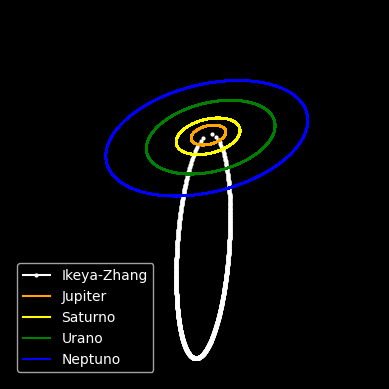

In [ ]:
plt.style.use('dark_background')  # Estilo oscuro "negro" del plot.

fig = plt.figure()
ax=fig.add_subplot(111,projection="3d")  # Se crea la figura 3d.

# Planetas a calcular su posición en un periodo.
jupiter, saturno, neptuno, urano = [], [], [], []

for i,t in enumerate(np.linspace(0,T,1000)): # Cálculo de las posiciones de los planetas en el periodo que tarda
                                             # Ikeya-Zhang en completar una órbita.
  sim.integrate(t)
  jupiter.append(sim.particles['Jupiter'].xyz)
  saturno.append(sim.particles['Saturn'].xyz)
  neptuno.append(sim.particles['Neptune'].xyz)
  urano.append(sim.particles['Uranus'].xyz)

# Conversión de listas a matrices para facilidad del gráfico y reducción de lineas.
jupiter = np.array(jupiter)
saturno = np.array(saturno)
neptuno = np.array(neptuno)
urano = np.array(urano)


for t in np.linspace(0,T,1000, retstep=False): # Graficar en el periodo del cometa.
  X=spy.conics([q,e,i,O,w,M,tp,mu],t) # Vector de estado.
  ax.plot(X[0],X[1],X[2], '-o', markersize = 2, label='Ikeya-Zhang', color='white');
  ax.plot(jupiter[:,0],jupiter[:,1],jupiter[:,2], label='Jupiter', color='orange');
  ax.plot(saturno[:,0],saturno[:,1],saturno[:,2], label='Saturno', color='yellow');
  ax.plot(urano[:,0],urano[:,1],urano[:,2], label='Urano', color='green');
  ax.plot(neptuno[:,0],neptuno[:,1],neptuno[:,2], label='Neptuno', color='blue');

#------ SECCIÓN DE ESTÉTICA---------

# Hacer panel transparente
ax.axis('off')

# Definir distancias de los ejes
ax.set_xlim3d(-50, 30)
ax.set_zlim3d(-1000, 10)
ax.set_ylim3d(-20, 35)

ax.legend(["Ikeya-Zhang","Jupiter","Saturno","Urano","Neptuno"])
plt.show()

ax.axis('equal');

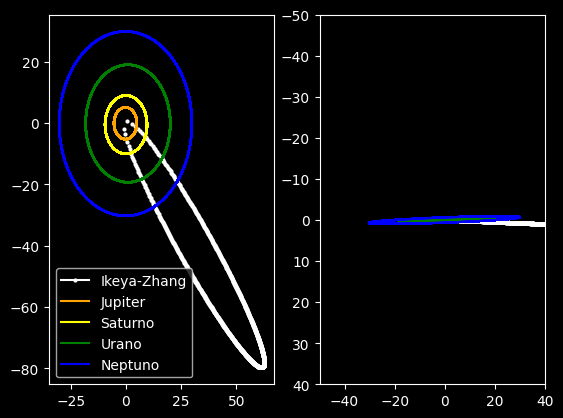

In [ ]:
# Gráfico de las proyecciones en el eje X,Y y X,Z.

fig,ax=plt.subplots(1,2) # Subplot de 1x2


for t in np.linspace(0,T,1000, retstep=False):
  X=spy.conics([q,e,i,O,w,M,tp,mu],t)
  ax[0].plot(X[0],X[1], '-o', markersize = 2, label='Ikeya-Zhang', color='white');
  ax[0].plot(jupiter[:,0],jupiter[:,1], label='Jupiter', color='orange');
  ax[0].plot(saturno[:,0],saturno[:,1], label='Saturno', color='yellow');
  ax[0].plot(urano[:,0],urano[:,1], label='Urano', color='green');
  ax[0].plot(neptuno[:,0],neptuno[:,1], label='Neptuno', color='blue');

  # Plot 2
  ax[1].plot(X[0],X[2], '-o', markersize = 2, label='Ikeya-Zhang', color='white');
  ax[1].plot(jupiter[:,0],jupiter[:,2], label='Jupiter', color='orange');
  ax[1].plot(saturno[:,0],saturno[:,2], label='Saturno', color='yellow');
  ax[1].plot(urano[:,0],urano[:,2], label='Urano', color='green');
  ax[1].plot(neptuno[:,0],neptuno[:,2], label='Neptuno', color='blue');

#------ SECCIÓN DE ESTÉTICA---------

ax[0].legend(["Ikeya-Zhang","Jupiter","Saturno","Urano","Neptuno"], loc='lower left')
ax[1].set_ylim([-50,40])
ax[1].set_xlim([-50,40])
ax[1].invert_yaxis()

In [ ]:
# Líneas de proyección sobre la elipse

#Definimos vectores que contengan las coordenadas en X,Y y Z.

X0, X1, X2 = [], [], []

for t in np.linspace(0,T,50, retstep=False):
  X=spy.conics([q,e,i,O,w,M,tp,mu],t)
  X0.append(X[0]) # Incluimos los valores al vector X.
  X1.append(X[1]) # Incluimos los valores al vector Y.
  X2.append(X[2]*10) # Incluimos los valores al vector Z.

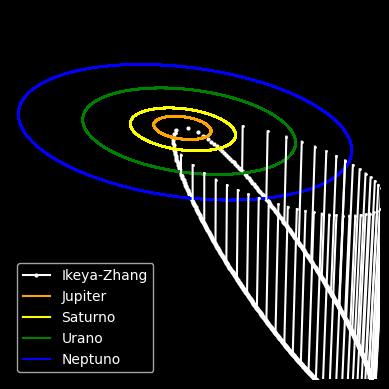

In [ ]:
# Proyecciones de la órbita sobre la eclíptica.
# CÓDIGO MODIFICADO DE https://stackoverflow.com/questions/8453726/is-there-a-matplotlib-counterpart-of-matlab-stem3
# (Gracias Stack-Overflow, fue un tesoro después de 7 arduas horas de programación continua).

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d # Librería para 3D.
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')


for t in np.linspace(0,T,1000, retstep=False):
  X=spy.conics([q,e,i,O,w,M,tp,mu],t)
  ax.plot(X[0],X[1],X[2], '-o', markersize = 2, label='Ikeya-Zhang', color='white');
  ax.plot(jupiter[:,0],jupiter[:,1],jupiter[:,2], label='Jupiter', color='orange');
  ax.plot(saturno[:,0],saturno[:,1],saturno[:,2], label='Saturno', color='yellow');
  ax.plot(urano[:,0],urano[:,1],urano[:,2], label='Urano', color='green');
  ax.plot(neptuno[:,0],neptuno[:,1],neptuno[:,2], label='Neptuno', color='blue');

# Parte donde se grafica las lineas hacia la eclíptica.

N = 100
x = X0
y = X1
z = X2
for xi, yi, zi in zip(x, y, z):
    line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi*70)), marker='o',markersize = '1', markevery=(1, 1), color = 'white')
    ax.add_line(line)
ax.set_xlim3d(-20, 20)
ax.set_ylim3d(-20, 35)
ax.set_zlim3d(-1000, 10)

#------ SECCIÓN DE ESTÉTICA---------
ax.axis('off')

ax.legend(["Ikeya-Zhang","Jupiter","Saturno","Urano","Neptuno"])
plt.show()